In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding,Conv1D, MaxPooling1D,Input,Concatenate,SimpleRNN
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model

In [3]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Download nltk library

In [4]:
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/README  
  inflating: /kaggle/w

Read Dataset

In [11]:
data =pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv', encoding = 'latin',header=None)

In [12]:
data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [13]:
data.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
data.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
data = data.drop(['id', 'date', 'query', 'user_id'], axis=1)
data

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [15]:
data['sentiment'].replace({4: 1}, inplace=True) # 0 for negative and 1 for positive sentiments
data

/tmp/ipykernel_33/1149462239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sentiment'].replace({4: 1}, inplace=True) # 0 for negative and 1 for positive sentiments


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


Visualization

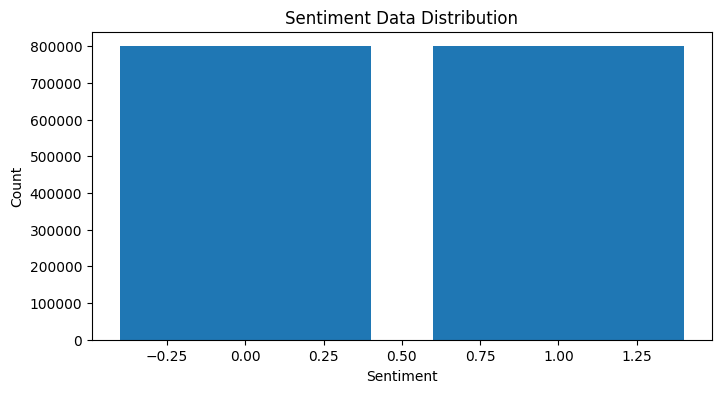

In [16]:
val_count = data.sentiment.value_counts()

# Plotting
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

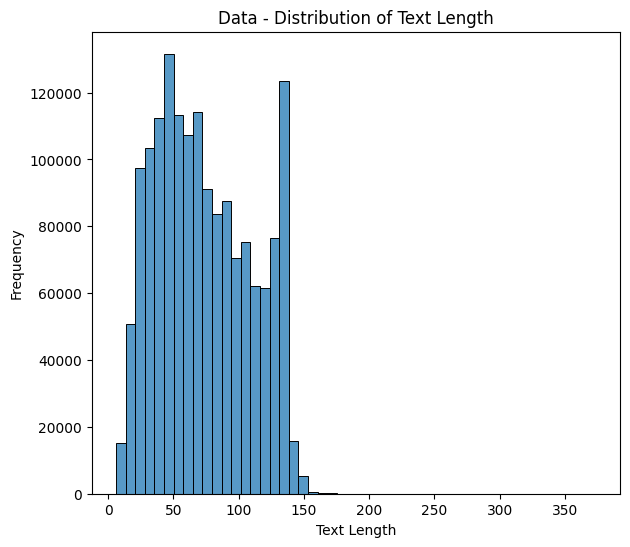

In [17]:
# Visualize a histogram of the text lengths for data
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.histplot(data['text_length'], bins=50)
plt.title('Data - Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

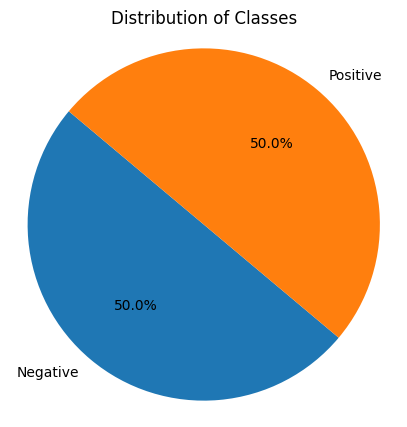

In [18]:
# Count the number of rows for each class
class_counts = data['sentiment'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

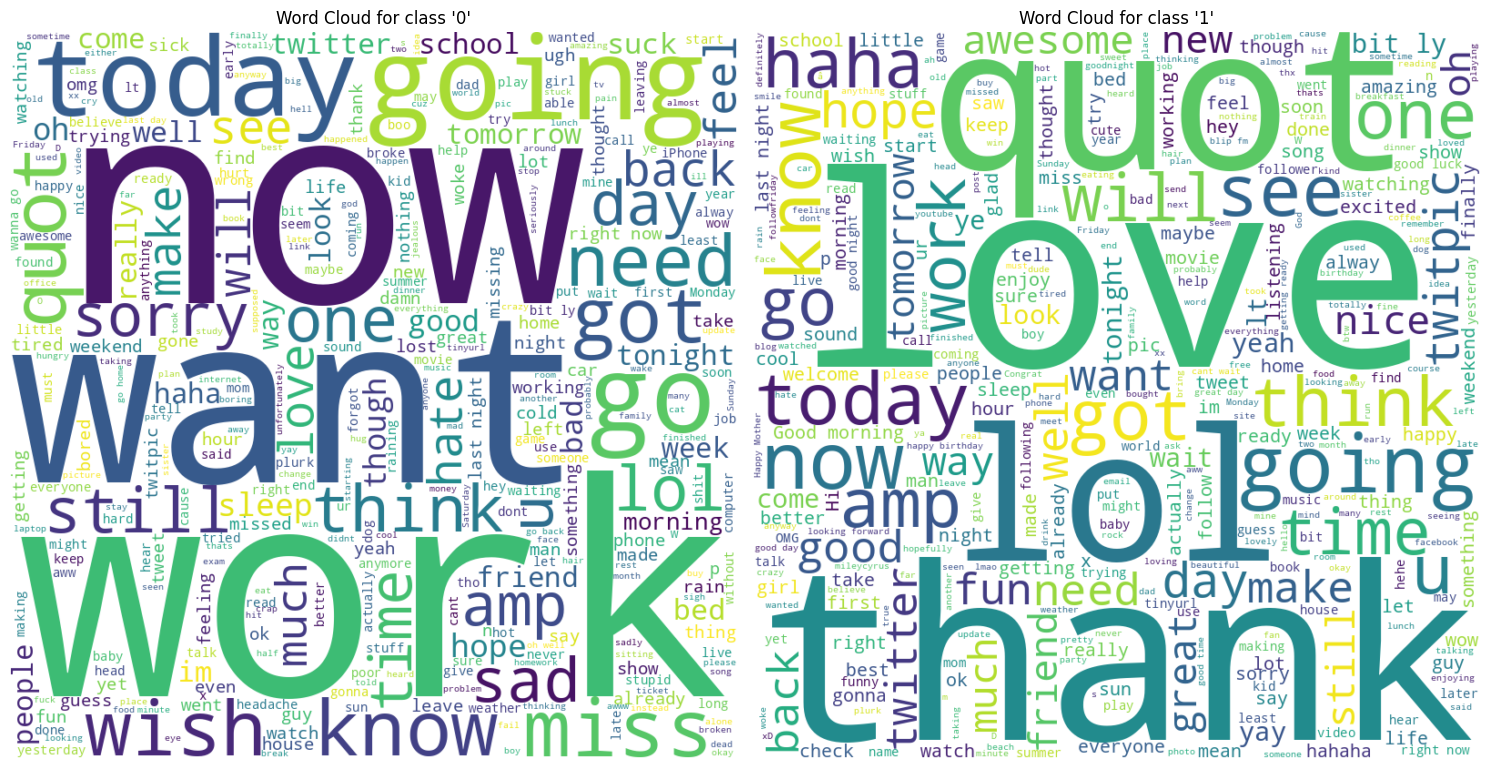

In [19]:
from wordcloud import WordCloud

# Function to generate word cloud for a specific class
def generate_wordcloud(text, ax, title):
    wordcloud = WordCloud(width=800, height=800, 
                          background_color='white', 
                          stopwords=None, 
                          max_words = 350,
                          min_font_size=10).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis("off")

# Generate word cloud for each class in subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for i, label in enumerate(data['sentiment'].unique()):
    text = ' '.join(data[data['sentiment'] == label]['text'])
    row = i // 2
    col = i % 2
    generate_wordcloud(text, axs[col], f"Word Cloud for class '{label}'")

plt.tight_layout()
plt.show()


In [20]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase and remove tags    
    text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [21]:
data['preprocessed_text'] = data['text'].apply(preprocess_text)
data

,sentiment,text,text_length,preprocessed_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,awww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,111,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,89,dived many time ball managed save 50 rest go b...
3,0,my whole body feels itchy and like its on fire,47,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",111,behaving mad see
...,...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,56,woke school best feeling ever
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,78,thewdb com cool hear old walt interview
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,57,ready mojo makeover ask detail
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,65,happy 38th birthday boo alll time tupac amaru ...


In [22]:
# Splits Dataset into Training and Testing set
train_data, test_data = train_test_split(data, test_size=0.2,random_state=100) 
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 595294


In [24]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text), maxlen = 80)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),maxlen = 80)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 80)
Testing X Shape: (320000, 80)


In [25]:
y_train = np.array(train_data['sentiment']).reshape(-1,1)
y_test = np.array(test_data['sentiment']).reshape(-1,1)
print("Training Y Shape:",y_train.shape)
print("Testing Y Shape:",y_test.shape)

Training Y Shape: (1280000, 1)
Testing Y Shape: (320000, 1)


In [29]:
print(x_train[0])

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0  46131     72     53    447      2
    689     91     10 196578      9    800     16    100    126   1285]


In [30]:
embedding_layer = Embedding(vocab_size,100,input_length=80,trainable=False)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [32]:
print(x_train.shape,y_train.shape)

(1280000, 80) (1280000, 1)


Build Models

1 - Simple RNN Without CNN

In [34]:
from tensorflow.keras.layers import SimpleRNN

# Define the model
sequence_input = Input(shape=(80,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2)(embedding_sequences)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(sequence_input, outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=256, epochs=5)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)




Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 217s 43ms/step - accuracy: 0.5035 - loss: 0.6936
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 212s 42ms/step - accuracy: 0.5269 - loss: 0.6897
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 213s 43ms/step - accuracy: 0.5783 - loss: 0.6733
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 265s 43ms/step - accuracy: 0.5977 - loss: 0.6638
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 214s 43ms/step - accuracy: 0.5991 - loss: 0.6629
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 69s 7ms/step - accuracy: 0.6207 - loss: 0.6519
Test Loss: 0.6520582437515259
Test Accuracy: 0.6211437582969666


In [37]:
def print_sample_predictions(model, x_test, y_test, num_samples=20):
    # Take num_samples samples from test data
    sample_indices = np.random.choice(range(len(x_test)), num_samples, replace=False)
    x_sample = x_test[sample_indices]
    y_sample_true = y_test[sample_indices]

    # Predict on the sample
    y_sample_pred = model.predict(x_sample)

    # Round the predictions to get binary labels
    y_sample_pred_binary = np.round(y_sample_pred)

    # Print true label and predicted label for each sample
    for i in range(len(x_sample)):
        print("Sample ", i+1)
        print("Text Embedding:", x_sample[i])
        print("True Label:", y_sample_true[i])
        print("Predicted Label:", y_sample_pred_binary[i])
        print()

# Call the function
print_sample_predictions(model, x_test, y_test, num_samples=15)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Sample  1
Text Embedding: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45
  45  45   1  64 179  41   9 416]
True Label: [0]
Predicted Label: [0.]

Sample  2
Text Embedding: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  110    5 1153 1016  175  124]
True Label: [0]
Predicted Label: [0.]

Sample  3
Text Embedding: [    0     0     0     0     0     0     0     0     0     0     0     0

2 - Simple RNN and  Simple CNN Architecture

In [38]:
# Define the model
sequence_input = Input(shape=(80,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x1 = Conv1D(64, 5, activation='relu')(embedding_sequences)
x1 = MaxPooling1D(pool_size=4)(x1)
x1 = SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2)(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dense(512, activation='relu')(x1)
outputs = Dense(1, activation='sigmoid')(x1)
model_cnn = Model(sequence_input, outputs)

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_cnn.fit(x_train, y_train, batch_size=256, epochs=5)

# Evaluate the model
loss, accuracy = model_cnn.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Call the function
print_sample_predictions(model_cnn, x_test, y_test, num_samples=15)

Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 269s 53ms/step - accuracy: 0.6840 - loss: 0.5743
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 265s 53ms/step - accuracy: 0.7611 - loss: 0.4895
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 263s 53ms/step - accuracy: 0.7710 - loss: 0.4754
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 267s 53ms/step - accuracy: 0.7761 - loss: 0.4671
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 325s 54ms/step - accuracy: 0.7787 - loss: 0.4630
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 6ms/step - accuracy: 0.7865 - loss: 0.4524
Test Loss: 0.4526432156562805
Test Accuracy: 0.7861812710762024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
Sample  1
Text Embedding: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0 

3 - CNN Architecture ( VGG16 )

In [44]:
# Define the model VGG16
sequence_input = Input(shape=(80,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

x2 = Embedding(input_dim=vocab_size, output_dim=100, input_length=80)(sequence_input)

x2 = Conv1D(16, 3, activation='relu', padding='same')(x2)
x2 = Conv1D(16, 3, activation='relu', padding='same')(x2)
x2 = MaxPooling1D(2)(x2)

x2 = Conv1D(16, 3, activation='relu', padding='same')(x2)
x2 = Conv1D(16, 3, activation='relu', padding='same')(x2)
x2 = MaxPooling1D(2)(x2)

x2 = Conv1D(8, 3, activation='relu', padding='same')(x2)
x2 = Conv1D(8, 3, activation='relu', padding='same')(x2)
x2 = Conv1D(8, 3, activation='relu', padding='same')(x2)
x2 = MaxPooling1D(2)(x2)

x2 = Conv1D(8, 3, activation='relu', padding='same')(x2)
x2 = Conv1D(8, 3, activation='relu', padding='same')(x2)
x2 = Conv1D(8, 3, activation='relu', padding='same')(x2)
x2 = MaxPooling1D(2)(x2)

x2 = Conv1D(16, 3, activation='relu', padding='same')(x2)
x2 = Conv1D(16, 3, activation='relu', padding='same')(x2)
x2 = Conv1D(16, 3, activation='relu', padding='same')(x2)
x2 = MaxPooling1D(2)(x2)

x2 = Flatten()(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(64, activation='relu')(x2)

outputs = Dense(1, activation='sigmoid')(x2)

model_vgg16 = Model(sequence_input, outputs)

# Compile the model
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_vgg16.fit(x_train, y_train, batch_size=400, epochs=1)

# Evaluate the model
loss, accuracy = model_vgg16.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Call the function
print_sample_predictions(model_vgg16, x_test, y_test, num_samples=15)

3200/3200 ━━━━━━━━━━━━━━━━━━━━ 1597s 497ms/step - accuracy: 0.4999 - loss: 0.6932
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.5013 - loss: 0.6931
Test Loss: 0.6931454539299011
Test Accuracy: 0.5013562440872192
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
Sample  1
Text Embedding: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 1149
   49   58  458  806    2   37 1241   26 4905  202]
True Label: [0]
Predicted Label: [0.]

Sample  2
Text Embedding: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0

4 - CNN Architecture ( Inception Modules )

Epoch 1/5
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 421s 145ms/step - accuracy: 0.6876 - loss: 0.5721 - val_accuracy: 0.7629 - val_loss: 0.4851
Epoch 2/5
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 448s 148ms/step - accuracy: 0.7753 - loss: 0.4684 - val_accuracy: 0.7746 - val_loss: 0.4701
Epoch 3/5
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 450s 150ms/step - accuracy: 0.7873 - loss: 0.4493 - val_accuracy: 0.7771 - val_loss: 0.4669
Epoch 4/5
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 412s 143ms/step - accuracy: 0.7935 - loss: 0.4379 - val_accuracy: 0.7788 - val_loss: 0.4633
Epoch 5/5
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 427s 138ms/step - accuracy: 0.7989 - loss: 0.4286 - val_accuracy: 0.7774 - val_loss: 0.4641
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 63s 6ms/step - accuracy: 0.7799 - loss: 0.4615
Test Loss: 0.46175605058670044
Test Accuracy: 0.7793124914169312


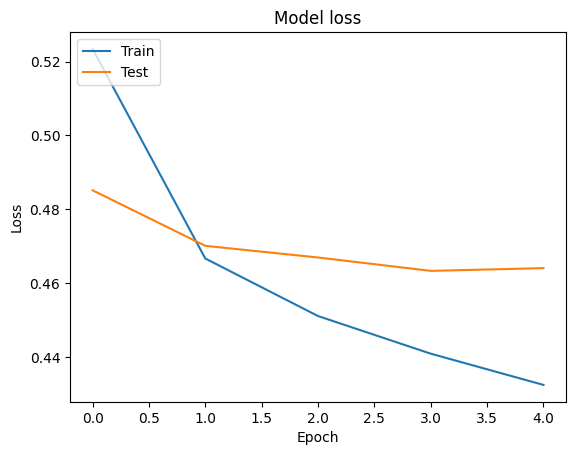

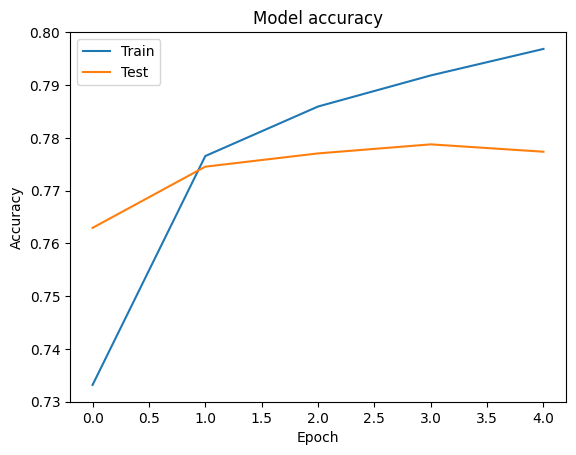

In [47]:

# Define the model
sequence_input = Input(shape=(80,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

x1 = Conv1D(16, 1, activation='relu', padding='same')(embedding_sequences)
x2 = Conv1D(16, 3, activation='relu', padding='same')(embedding_sequences)
x3 = Conv1D(16, 5, activation='relu', padding='same')(embedding_sequences)
x4 = Conv1D(16, 7, activation='relu', padding='same')(embedding_sequences)
x5 = Conv1D(16, 9, activation='relu', padding='same')(embedding_sequences)
x6 = MaxPooling1D(pool_size=3, strides=1, padding='same')(embedding_sequences)
x6 = Conv1D(16, 1, activation='relu', padding='same')(x6)

x = Concatenate(axis=-1)([x1, x2, x3, x4, x5, x6])

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

outputs = Dense(1, activation='sigmoid')(x)

model_inception = Model(sequence_input, outputs)

# Compile the model
model_inception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_inception.fit(x_train, y_train, batch_size=356, epochs=5,validation_split=0.2)

# Evaluate the model
loss, accuracy = model_inception.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [48]:
# Call the function
print_sample_predictions(model_inception, x_test, y_test, num_samples=15)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Sample  1
Text Embedding: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   119   773    30 41245
    19    15   122     1   509    22    86     2  1868    21     7    18
     7     6    44  3641    35    10     5  1251]
True Label: [1]
Predicted Label: [0.]

Sample  2
Text Embedding: [     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      

In [49]:
def predict_sentiment(model, text):
    preprocessed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([preprocessed_text])
    padded_sequence = pad_sequences(sequence, maxlen=80)
    prediction = model.predict(padded_sequence)[0][0]
    if prediction >= 0.5:
        return "Positive"
    else:
        return "Negative"

In [50]:
# Example usage
sentence = "I really liked this movie, it was fantastic!"
predicted_label = predict_sentiment(model_inception, sentence)
print("Predicted Label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted Label: Positive


In [51]:
sentence = "Today AI and ML become good for this days"
predicted_label = predict_sentiment(model_inception, sentence)
print("Predicted Label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label: Positive


In [53]:
sentence = "AI is more difficult and bad in this days"
predicted_label = predict_sentiment(model_inception, sentence)
print("Predicted Label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label: Negative


In [54]:
sentence = "we worry from animals "
predicted_label = predict_sentiment(model_inception, sentence)
print("Predicted Label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Label: Positive


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 6ms/step


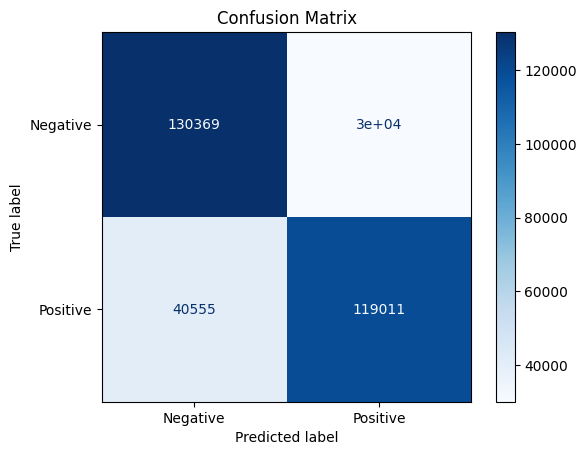

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = model_inception.predict(x_test)
y_pred = (y_pred > 0.5)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [56]:
from sklearn.metrics import classification_report


# Print classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


              precision    recall  f1-score   support

    Negative       0.76      0.81      0.79    160434
    Positive       0.80      0.75      0.77    159566

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

